## 安裝TensorFlow

In [1]:
! pip install tensorflow

tensorflow-tensorboard 0.1.7 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
tensorflow-tensorboard 0.1.7 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.


In [2]:
import tensorflow as tf

C:\Users\Vincent\Anaconda3\envs\myenv\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 常數 (Constant)

In [3]:
hello = tf.constant('Hello World')
hello

<tf.Tensor 'Const:0' shape=() dtype=string>

In [4]:
type(hello)

tensorflow.python.framework.ops.Tensor

## 會話 (Session)

In [5]:
s = tf.Session()
s

In [6]:
type(s)

tensorflow.python.client.session.Session

In [7]:
s.run(hello)

b'Hello World'

In [8]:
a = s.run(hello)

In [9]:
a

b'Hello World'

In [10]:
type(a)

bytes

## Tensorflow Basic

### 常數

In [11]:
x  = tf.constant(100)

In [12]:
x

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [13]:
type(x)

tensorflow.python.framework.ops.Tensor

### 會話 (Session)

In [14]:
sess = tf.Session()
sess.run(x)

100

In [15]:
type(sess)

tensorflow.python.client.session.Session

In [16]:
y = sess.run(x)

In [17]:
y

100

In [18]:
type(y)

numpy.int32

In [19]:
sess.close()

### Operation (操作)

In [20]:
x = tf.constant(2)
y = tf.constant(3)

In [21]:
x

<tf.Tensor 'Const_2:0' shape=() dtype=int32>

In [22]:
y

<tf.Tensor 'Const_3:0' shape=() dtype=int32>

In [23]:
x + y

<tf.Tensor 'add:0' shape=() dtype=int32>

In [24]:
with tf.Session() as sess:
    print(sess.run(x + y))
    print(sess.run(x - y))
    print(sess.run(x * y))
    print(sess.run(x / y))

5
-1
6
0.6666666666666666


### Placeholder 

In [25]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [26]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [27]:
type(x)

tensorflow.python.framework.ops.Tensor

### 定義操作 

In [28]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)
div = tf.divide(x,y)

In [29]:
with tf.Session() as sess:
    print(sess.run(add, feed_dict={x:20, y:30}))
    print(sess.run(sub, feed_dict={x:20, y:30}))
    print(sess.run(mul, feed_dict={x:20, y:30}))
    print(sess.run(div, feed_dict={x:20, y:30}))

50
-10
600
0.6666666666666666


In [30]:
with tf.Session() as sess:
    x = sess.run(add, feed_dict={x:20, y:30})

In [31]:
x

50

In [32]:
type(x)

numpy.int32

### 矩陣操作

In [33]:
import numpy as np
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [34]:
a

array([[5., 5.]])

In [35]:
a.shape

(1, 2)

In [36]:
b

array([[2.],
       [2.]])

In [37]:
b.shape

(2, 1)

In [38]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [39]:
matrix_multi = tf.matmul(mat1,mat2)

In [40]:
with tf.Session() as sess:
    x = sess.run(matrix_multi)

In [41]:
x

array([[20.]])

## 使用TensorFlow 辨識手寫數字

In [42]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("..", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ..\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ..\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ..\t10k-images-idx3-ubyte.gz
Extracting ..\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [43]:
#mnist

In [44]:
#dir(mnist)

In [45]:
#dir(mnist.train)

In [46]:
mnist.train.images.shape

(55000, 784)

In [47]:
28 * 28 

784

In [48]:
mnist.train.images[0].shape

(784,)

In [49]:
import numpy as np
a = np.array([1,2,3,4,5,6])
a.reshape((2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [50]:
sample_image = mnist.train.images[0].reshape((28,28))

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vincent\Anaconda3\envs\myenv\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['add']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


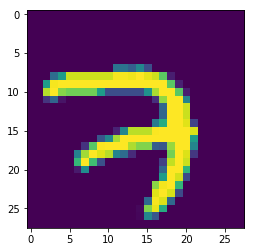

In [51]:
% pylab inline
import matplotlib.pyplot as plt
plt.imshow(sample_image)

In [52]:
 mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [53]:
sample_image2 = mnist.train.images[2].reshape((28,28))

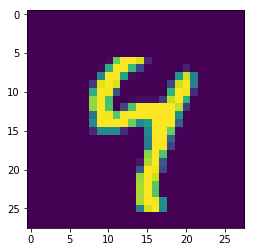

In [54]:

plt.imshow(sample_image2)

In [55]:
mnist.train.labels[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

### 設定網路參數

In [56]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [57]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

In [58]:
n_samples

55000

### Placeholders

In [59]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### 建構多層神經網路

In [60]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 設定權重(weight)與偏椅(bias)

In [61]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [62]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 建立模型

In [63]:
pred = multilayer_perceptron(x, weights, biases)

### 設定代價函數

In [64]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### 初始化變量

In [65]:
init = tf.global_variables_initializer()

### 訓練模型

In [66]:
Xsamp,ysamp = mnist.train.next_batch(100)

In [67]:
Xsamp.shape

(100, 784)

In [68]:
ysamp.shape

(100, 10)

In [69]:
Xsamp,ysamp = mnist.train.next_batch(1)

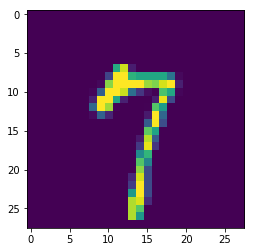

In [70]:
sample_image = Xsamp.reshape((28,28))
plt.imshow(sample_image)

In [71]:
ysamp

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [72]:
# Start the session
with tf.Session() as sess:
    
    # Intialize all the variables
    sess.run(init)

    for epoch in range(training_epochs):

        # Initial the cost = 0.0
        avg_cost = 0.0

        total_batch = int(n_samples/batch_size)

        for i in range(total_batch):

            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

            # Compute average loss
            avg_cost += c / total_batch

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=152.35641416723087
Epoch: 2 cost=56.91476662375707
Epoch: 3 cost=42.399349527359
Epoch: 4 cost=34.53452582879497
Epoch: 5 cost=29.337921257019033
Epoch: 6 cost=25.51230037862605
Epoch: 7 cost=22.751188859072585
Epoch: 8 cost=20.552295155091727
Epoch: 9 cost=18.656486178203046
Epoch: 10 cost=17.136993718255656
Epoch: 11 cost=15.892244751886883
Epoch: 12 cost=14.729616505598491
Epoch: 13 cost=13.715722453485844
Epoch: 14 cost=12.913987345370366
Epoch: 15 cost=12.110824023485172
Training Completed in 15 Epochs


### 評估模型

In [73]:
y

<tf.Tensor 'Placeholder_3:0' shape=(?, 10) dtype=float32>

In [74]:
pred

<tf.Tensor 'add_5:0' shape=(?, 10) dtype=float32>

In [75]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [76]:
correct_predictions

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [77]:
correct_predictions = tf.cast(correct_predictions, "float")

In [78]:
accuracy = tf.reduce_mean(correct_predictions)

In [79]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [80]:
# Start the session
with tf.Session() as sess:
    
    # Intialize all the variables
    sess.run(init)

    for epoch in range(training_epochs):

        # Initial the cost = 0.0
        avg_cost = 0.0

        total_batch = int(n_samples/batch_size)

        for i in range(total_batch):

            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

            # Compute average loss
            avg_cost += c / total_batch

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))
    print(accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=151.29429406599553
Epoch: 2 cost=56.208034655831085
Epoch: 3 cost=41.02366431669754
Epoch: 4 cost=33.22835090463812
Epoch: 5 cost=28.258471592989853
Epoch: 6 cost=24.658155317306537
Epoch: 7 cost=21.93818577506324
Epoch: 8 cost=19.768001412044896
Epoch: 9 cost=18.061110977476304
Epoch: 10 cost=16.535459846691676
Epoch: 11 cost=15.338937624584549
Epoch: 12 cost=14.216174943230385
Epoch: 13 cost=13.249481843140984
Epoch: 14 cost=12.425517906167295
Epoch: 15 cost=11.67151695883072
0.9107
Training Completed in 15 Epochs


## TensorBoard
- tensorboard --logdir tensorboard

In [81]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

In [82]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

In [83]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

In [84]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

In [85]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [86]:
init = tf.global_variables_initializer()

In [87]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=168.33652656555176
Epoch: 2 cost=59.72712675961577
Epoch: 3 cost=43.42733197819101
Epoch: 4 cost=34.818109704797926
Epoch: 5 cost=29.45237979932265
Epoch: 6 cost=25.594845942583973
Epoch: 7 cost=22.756572300629156
Epoch: 8 cost=20.33150799718769
Epoch: 9 cost=18.654797951308154
Epoch: 10 cost=17.064534617337312
Epoch: 11 cost=15.771949321898544
Epoch: 12 cost=14.682593825513656
Epoch: 13 cost=13.672067092955093
Epoch: 14 cost=12.77438227855725
Epoch: 15 cost=11.985011811526483
Training Completed in 15 Epochs


## 安裝Keras

In [88]:
! pip install keras

tensorflow-tensorboard 0.1.7 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
tensorflow-tensorboard 0.1.7 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.


## 使用Keras 辨識手寫數字

In [89]:
import keras

Using TensorFlow backend.


In [90]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [91]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [92]:
x_train.shape

(60000, 28, 28)

In [93]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [94]:
x_test.shape

(10000, 28, 28)

In [95]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

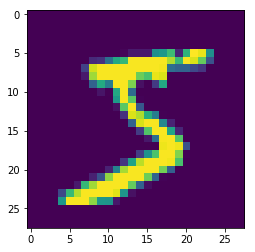

In [96]:
plt.imshow(x_train[0])

In [97]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)

In [98]:
np.max(x_train[0])
np.min(x_train[0])

0

In [99]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [100]:
np.max(x_train[0])
np.min(x_train[0])

0.0

In [101]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [102]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [103]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [104]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### 設定網路參數

In [105]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建構神經網路

In [106]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [107]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [108]:
## Dense = activation_function(X * Weight + Bias)

### 訓練神經網路

In [109]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 68us/step - loss: 1.0352 - acc: 0.7519 - val_loss: 0.4873 - val_acc: 0.8797
Epoch 2/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.4238 - acc: 0.8863 - val_loss: 0.3529 - val_acc: 0.9027
Epoch 3/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.3433 - acc: 0.9035 - val_loss: 0.3063 - val_acc: 0.9148
Epoch 4/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.3054 - acc: 0.9133 - val_loss: 0.2782 - val_acc: 0.9214
Epoch 5/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.2798 - acc: 0.9202 - val_loss: 0.2572 - val_acc: 0.9278
Epoch 6/15
60000/60000 [==============================] - 4s 63us/step - loss: 0.2596 - acc: 0.9263 - val_loss: 0.2415 - val_acc: 0.9317
Epoch 7/15
60000/60000 [==============================] - 4s 64us/step - loss: 0.2431 - acc: 0.9307 - val_loss: 0.2263 - val_acc

In [110]:
predicted = np.argmax(model.predict(x_test), 1)

In [111]:
y = np.argmax(y_test, 1)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y, predicted)

0.954

In [113]:
confusion_matrix(y, predicted)

array([[ 967,    0,    1,    1,    0,    4,    4,    2,    1,    0],
       [   0, 1114,    2,    2,    0,    1,    3,    2,   11,    0],
       [   6,    2,  981,   10,    7,    2,    6,    6,   10,    2],
       [   1,    1,   11,  967,    0,    7,    0,   10,    9,    4],
       [   1,    0,    4,    2,  932,    0,   10,    3,    4,   26],
       [   9,    2,    0,   22,    1,  827,   11,    1,   13,    6],
       [  11,    3,    4,    0,    6,   10,  919,    1,    4,    0],
       [   1,    6,   19,    6,    4,    2,    0,  968,    3,   19],
       [   4,    1,    6,   13,    7,    5,    7,   10,  917,    4],
       [   8,    6,    1,   13,   21,    2,    1,    6,    3,  948]],
      dtype=int64)

## 使用者流失分析

### Method 1

In [114]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv')

In [115]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
X = dataset.iloc[:, 3:13]

In [117]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [118]:
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [119]:
y = dataset.iloc[:, 13]

In [120]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [121]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [122]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [123]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [124]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [125]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [126]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [127]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [128]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X)

In [129]:
X.toarray()[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
       0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [130]:
X = X.toarray()[:, 1:]

In [131]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

### Method 2

In [132]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv')

In [133]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [134]:
X = pd.concat([pd.get_dummies(X['Geography']), X], axis = 1)

In [135]:
del X['Geography']

In [136]:
del X['France']

In [137]:
X['Gender'] = X['Gender'].map(lambda e: 1 if e== 'Male' else 0 )

In [138]:
X.values.shape

(10000, 11)

In [139]:
y.values

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [140]:
X = X.values
y = y.values

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [142]:
X_train.shape

(8000, 11)

In [143]:
X_test.shape

(2000, 11)

In [144]:
y_train.shape

(8000,)

In [145]:
y_test.shape

(2000,)

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)


In [147]:
#X_train
#X_test

In [148]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initializing the ANN
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 2s 200us/step - loss: 0.5590 - acc: 0.7956
Epoch 2/100
8000/8000 [==============================] - 1s 164us/step - loss: 0.5087 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 165us/step - loss: 0.5061 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 166us/step - loss: 0.5060 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.5060 - acc: 0.7960
Epoch 6/100
8000/8000 [==============================] - 1s 164us/step - loss: 0.5059 - acc: 0.7960
Epoch 7/100
8000/8000 [==============================] - 1s 166us/step - loss: 0.5060 - acc: 0.7960
Epoch 8/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.5059 - acc: 0.7960
Epoch 9/100
8000/8000 [==============================] - 1s 167us/step - loss: 0.5059 - acc: 0.7960
Epoch 10/100
8000/8000 [==============================] - 1s 165us/step - loss: 0.5059 - acc: 0.7960

In [149]:
y_pred = classifier.predict(X_test)

In [150]:
y_pred = (y_pred > 0.5)


In [151]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.8615

In [153]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1528,   67],
       [ 210,  195]], dtype=int64)

## 調整Optimizer

In [162]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initializing the ANN
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 2s 293us/step - loss: 0.4907 - acc: 0.7959
Epoch 2/100
8000/8000 [==============================] - 2s 196us/step - loss: 0.4177 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 203us/step - loss: 0.4073 - acc: 0.8014
Epoch 4/100
8000/8000 [==============================] - 1s 182us/step - loss: 0.3981 - acc: 0.8279
Epoch 5/100
8000/8000 [==============================] - 2s 188us/step - loss: 0.3894 - acc: 0.8299
Epoch 6/100
8000/8000 [==============================] - 1s 179us/step - loss: 0.3834 - acc: 0.8345
Epoch 7/100
8000/8000 [==============================] - 1s 186us/step - loss: 0.3769 - acc: 0.8404
Epoch 8/100
8000/8000 [==============================] - 1s 185us/step - loss: 0.3730 - acc: 0.8456
Epoch 9/100
8000/8000 [==============================] - 1s 182us/step - loss: 0.3691 - acc: 0.8504
Epoch 10/100
8000/8000 [==============================] - 2s 192us/step - loss: 0.3668 - acc: 0.8506

8000/8000 [==============================] - 1s 179us/step - loss: 0.3428 - acc: 0.8606
Epoch 83/100
8000/8000 [==============================] - 1s 180us/step - loss: 0.3429 - acc: 0.8606
Epoch 84/100
8000/8000 [==============================] - 1s 181us/step - loss: 0.3430 - acc: 0.8610
Epoch 85/100
8000/8000 [==============================] - 1s 180us/step - loss: 0.3428 - acc: 0.8609
Epoch 86/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.3427 - acc: 0.8599
Epoch 87/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.3426 - acc: 0.8620
Epoch 88/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.3421 - acc: 0.8596
Epoch 89/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.3424 - acc: 0.8621
Epoch 90/100
8000/8000 [==============================] - 1s 182us/step - loss: 0.3428 - acc: 0.8600
Epoch 91/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.3412 - acc: 0.8615
Epo

KeyboardInterrupt: 

In [155]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn  = build_classifier, batch_size = 10, epochs = 15, verbose= 1)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()


Epoch 1/15
7200/7200 [==============================] - 1s 196us/step - loss: 0.5620 - acc: 0.7969
Epoch 2/15
7200/7200 [==============================] - 1s 159us/step - loss: 0.5044 - acc: 0.7971
Epoch 3/15
7200/7200 [==============================] - 1s 158us/step - loss: 0.4923 - acc: 0.7971
Epoch 4/15
7200/7200 [==============================] - 1s 159us/step - loss: 0.4764 - acc: 0.7971
Epoch 5/15
7200/7200 [==============================] - 1s 159us/step - loss: 0.4580 - acc: 0.7971
Epoch 6/15
7200/7200 [==============================] - 1s 159us/step - loss: 0.4426 - acc: 0.7971
Epoch 7/15
7200/7200 [==============================] - 1s 161us/step - loss: 0.4315 - acc: 0.7971
Epoch 8/15
7200/7200 [==============================] - 1s 159us/step - loss: 0.4249 - acc: 0.8036
Epoch 9/15
7200/7200 [==============================] - 1s 162us/step - loss: 0.4211 - acc: 0.8124
Epoch 10/15
7200/7200 [==============================] - 1s 156us/step - loss: 0.4181 - acc: 0.8168
Epoch 11/

In [156]:
accuracies

array([0.81999999, 0.83375   , 0.81124999, 0.83125   , 0.8475    ,
       0.83125   , 0.7875    , 0.81625   , 0.81499999, 0.84      ])

In [157]:
mean

0.8233749957382679

In [158]:
variance

0.01629848514730862

### Dropout

In [161]:
from keras.layers import Dropout

In [ ]:
# classifier.add(Dropout(rate=0.1))

In [175]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn  = build_classifier, batch_size = 10, epochs = 15, verbose= 1)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()


Epoch 1/15
7200/7200 [==============================] - 3s 358us/step - loss: 0.5619 - acc: 0.7969
Epoch 2/15
7200/7200 [==============================] - 2s 219us/step - loss: 0.5079 - acc: 0.7971
Epoch 3/15
7200/7200 [==============================] - 2s 215us/step - loss: 0.5048 - acc: 0.7971
Epoch 4/15
7200/7200 [==============================] - 2s 216us/step - loss: 0.5045 - acc: 0.7971
Epoch 5/15
7200/7200 [==============================] - 2s 210us/step - loss: 0.5045 - acc: 0.7971
Epoch 6/15
7200/7200 [==============================] - 2s 214us/step - loss: 0.5045 - acc: 0.7971
Epoch 7/15
7200/7200 [==============================] - 2s 216us/step - loss: 0.5045 - acc: 0.7971
Epoch 8/15
7200/7200 [==============================] - 2s 226us/step - loss: 0.5045 - acc: 0.7971
Epoch 9/15
7200/7200 [==============================] - 2s 214us/step - loss: 0.5045 - acc: 0.7971
Epoch 10/15
7200/7200 [==============================] - 2s 211us/step - loss: 0.5045 - acc: 0.7971
Epoch 11/

KeyboardInterrupt: 

In [164]:
mean

0.8233749957382679

In [165]:
variance

0.01629848514730862

### 比較優化器

In [166]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def train_model(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    history = classifier.fit(X_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_test, y_test))
    return history

In [167]:
sgd_model = train_model('sgd')

In [168]:
rmsprop_model = train_model('RMSprop')

In [169]:
adagrad_model = train_model('Adagrad')

In [170]:
adadelta_model = train_model('Adadelta')

In [171]:
adam_model = train_model('Adam')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vincent\Anaconda3\envs\myenv\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


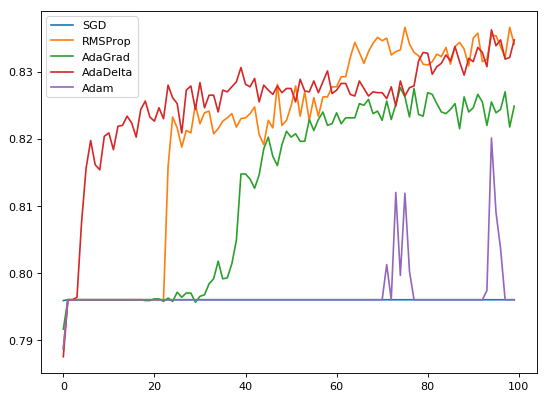

In [172]:
% pylab inline
import matplotlib.pyplot  as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sgd_model.epoch, sgd_model.history['acc'], label='SGD')
plt.plot(rmsprop_model.epoch, rmsprop_model.history['acc'], label='RMSProp')
plt.plot(adagrad_model.epoch, adagrad_model.history['acc'], label='AdaGrad')
plt.plot(adadelta_model.epoch, adadelta_model.history['acc'], label='AdaDelta')
plt.plot(adam_model.epoch, adam_model.history['acc'], label='Adam')
plt.legend()
plt.show()

### Grid Search

In [176]:
from sklearn.model_selection import GridSearchCV

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

ValueError: optimizer is not a legal parameter

## 比較深度學習模型與機器學習模型

In [177]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initializing the ANN
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [178]:
predicted = classifier.predict(X_test) > 0.5

In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predicted)

0.8675

In [180]:
confusion_matrix(y_test, predicted)

array([[1542,   53],
       [ 212,  193]], dtype=int64)

### ROC Curve (Reciever Operating Characteristic)

In [182]:
y_pred = classifier.predict(X_test)

In [181]:
predicted = classifier.predict(X_test) > 0.1
cm = confusion_matrix(y_test, predicted)
# TP = cm[0,0] #True Positive 你有病，醫生說你有病
# FN = cm[1,0] #False Negative 你有病，醫生說你沒病
# FP = cm[0,1] #False Positive 你沒病，醫生說你有病
# TN = cm[1,1] #True Negative 你沒病，醫生說你沒病
# TP, FN, FP, TN

TN = cm[0,0] #True Positive 你有病，醫生說你有病
FN = cm[1,0] #False Negative 你有病，醫生說你沒病
FP = cm[0,1] #False Positive 你沒病，醫生說你有病
TP = cm[1,1] #True Negative 你沒病，醫生說你沒病

TPR = TP / (TP+ FN) 
FPR = FP / (FP+ TN)

In [187]:
confusion_matrix(y_test, predicted)

array([[794, 801],
       [ 21, 384]], dtype=int64)

In [188]:
y_pred

array([[0.2019609 ],
       [0.23809108],
       [0.173627  ],
       ...,
       [0.16976655],
       [0.12664472],
       [0.17973824]], dtype=float32)

In [184]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vincent\Anaconda3\envs\myenv\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


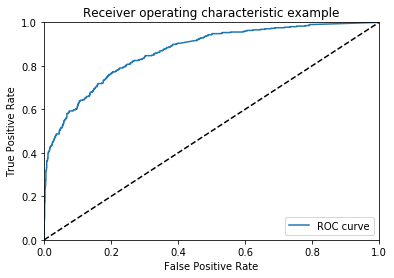

In [185]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(X_train, y_train)

clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

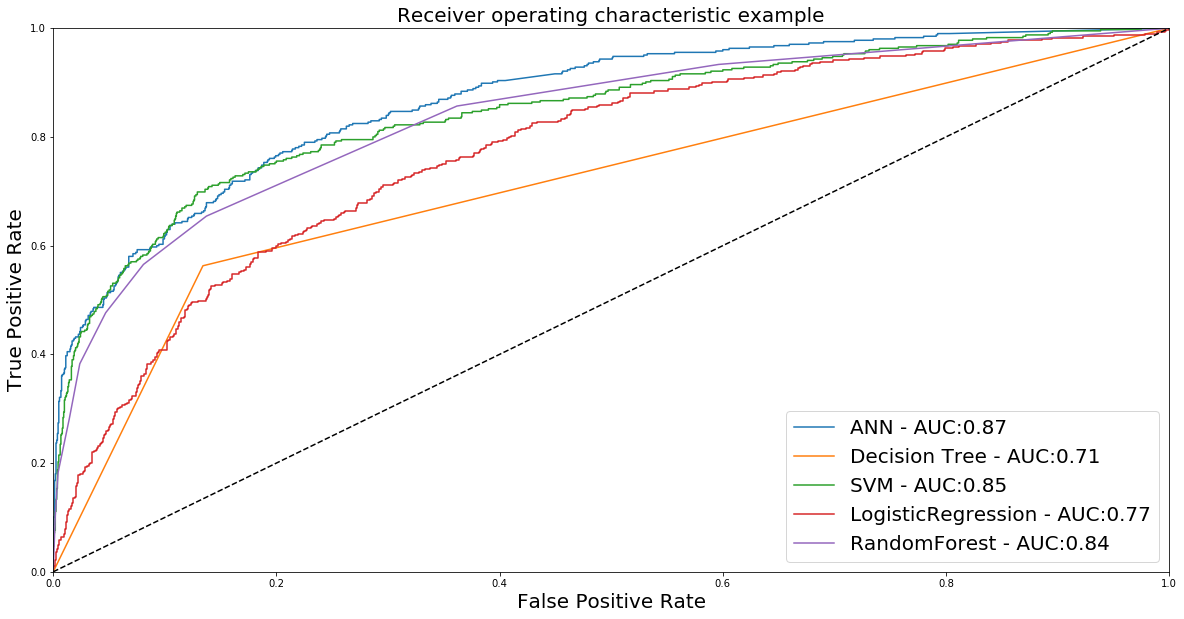

In [190]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()